<a href="https://colab.research.google.com/github/queziamirandaDev/MySql/blob/master/13_Regess%C3%A3o_Linear_V1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Questão de negocio

uma empresa esta interesada em verificar se a remuneração (salario) dos funcionarios esta de acordo com as politicas da empresa

para isso uma amostra de 46 colaboradores foi disponibilisada

* Pergunta de negocio: o salaraio muda de acordo com o ano de educação superior
* Se muda, é possivel prever o salario apartir de um modelo?

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [4]:
df_func = pd.read_csv('/content/base_funcionarios_v1.csv', delimiter=';', index_col='id')

df_func.head()

,Salario,Anos_Educ_Superior
id,,
1,5517.4,3
2,6399.9,4
3,6206.7,6
4,6060.6,4
5,6122.7,2


In [5]:
df_func.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 1 to 46
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Salario             46 non-null     float64
 1   Anos_Educ_Superior  46 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [6]:
df_func.describe().round(2)

,Salario,Anos_Educ_Superior
count,46.00,46.00
mean,6969.80,5.07
std,1924.87,2.84
min,4139.50,0.00
25%,5818.35,4.00
50%,6394.75,5.00
75%,7972.40,6.00
max,12118.10,12.00


In [7]:
df_func.isna().sum()

,0
Salario,0
Anos_Educ_Superior,0


<Axes: xlabel='Anos_Educ_Superior', ylabel='Salario'>

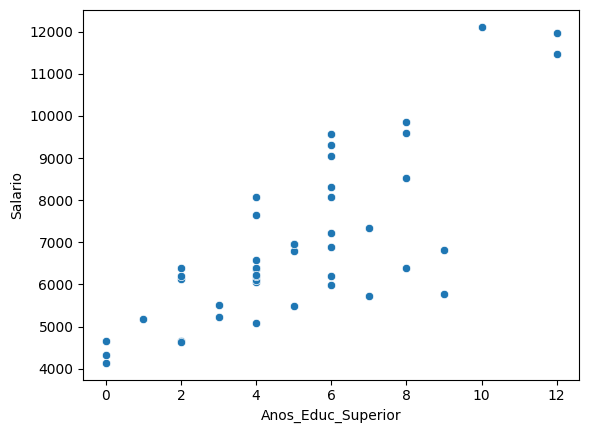

In [8]:
#grafico de dispersão
# eixo x explicativa
# eixo y resposta ou alvo (dependente)

sns.scatterplot(x=df_func['Anos_Educ_Superior'], y=df_func['Salario'])

In [9]:
#Correlação linear de pearson

df_func.corr()

,Salario,Anos_Educ_Superior
Salario,1.000000,0.776992
Anos_Educ_Superior,0.776992,1.000000


<Axes: >

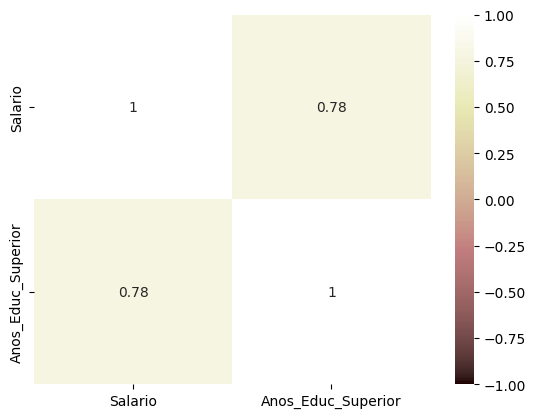

In [14]:
sns.heatmap(
    df_func.corr(),
    cmap='pink',
    vmin= -1,vmax= 1,
    annot=True
)

In [15]:
# ajuste do modelo

#variavel alvo

y = df_func['Salario']


#variavel explicativa
df_func['intercepto'] = 1
x=df_func[['intercepto','Anos_Educ_Superior']]

In [16]:
modelo = sm.OLS(y,x)

resultado = modelo.fit()

In [17]:
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     67.03
Date:                Fri, 19 Sep 2025   Prob (F-statistic):           2.18e-10
Time:                        23:18:37   Log-Likelihood:                -391.36
No. Observations:                  46   AIC:                             786.7
Df Residuals:                      44   BIC:                             790.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercepto          4301.7990    372